In [26]:
# base imports from opencv code
import numpy as np
import cv2
import glob
from scipy.io import loadmat, savemat
import json

# additional image debugging imports
from PIL import Image
import matplotlib.pyplot as plt

# Ipython helpers
from IPython.display import Image as ipyImage, display

from src.calibration.new.utils import get_first_frame_video, get_chessboard_coordinates, imshow

In [68]:
# capture vieo frame for EXTRINICS (tbd)
video_path='/Users/caxon/olveczky/dannce_data/setupCal11_010324/extrinsic/Camera1/0.mp4'
raw_img = get_first_frame_video(video_path=video_path)

In [71]:
# test calibration output: Raw arguments
undistorted_images_path="/Users/caxon/olveczky/dannce_data/test_chris_hannah/calPyScratch.mat"
output_matrix_path="/Users/caxon/olveczky/dannce_data/test_chris_hannah/test_output.mat"
rows=6
cols=9
square_size_mm=23

object_points = get_chessboard_coordinates(chessboard_cols=cols, chessboard_rows=rows, square_size_mm=square_size_mm)

In [82]:
# load sample values from intrinsics

camera_matrix=np.array([[2324.466194651469, 0.0, 969.8884981208598], [0.0, 2327.912870802337, 595.4936373188101], [0.0, 0.0, 1.0]])
dist=np.array([-0.07742087657785283, 0.1297213340681849, -0.00032313881746900107, 0.0002671398152261727])

In [79]:
# # iterate on the first camera
# for camera_idx in range(num_cameras):
#     camera_name = f"Camera{camera_idx+1}"
#     img_np = undistorted_images_rgb[:, :, :, camera_idx].squeeze()
    
#     img_rgb = cv2.UMat(img_np)
#     img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
#     img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
#     success, approx_vertex_coords = cv2.findChessboardCorners(
#         img_bgr, (chessboard_rows, chessboard_cols), None
#     )
    
#     subpix_vertex_coords = cv2.cornerSubPix(
#         img_gray,
#         approx_vertex_coords,
#         (chessboard_square_mm // 2, chessboard_square_mm // 2),
#         (-1, -1),
#         CORNER_TERMINATION_CRITERIA,
#     )
    
#     computed_vertex_coords[camera_idx, :,:] = subpix_vertex_coords.get().squeeze()


In [86]:
# load distorted image from video frame
img = get_first_frame_video(video_path=video_path)

## undistorting not necessary for solvePnP
## undistort frame using intrinsics
# undistorted_img = cv2.undistort(
#     src=distorted_img, cameraMatrix=intrinsics.camera_matrix, distCoeffs=dist_coeffs
# )

# find corner positions
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
success, corner_coords = cv2.findChessboardCorners(gray, (cols, rows), None)

if success is False:
    raise Exception("Unable to calibrte extrinsics")

# solve for camera position using solvePnp instead of camera calibration function
# ransac version fo solvePNP makes it more stable with possible outlier points
success, rvec, tvec, inliers  = cv2.solvePnPRansac(
    objectPoints=object_points,
    imagePoints=corner_coords,
    cameraMatrix=camera_matrix,
    distCoeffs=dist,
)


In [89]:
rotation_matrix, jac = cv2.Rodrigues(rvec)


array([[ 0.98730464, -0.15808785,  0.01541974],
       [ 0.08046489,  0.41409069, -0.9066721 ],
       [ 0.13694868,  0.89640233,  0.42155418]])

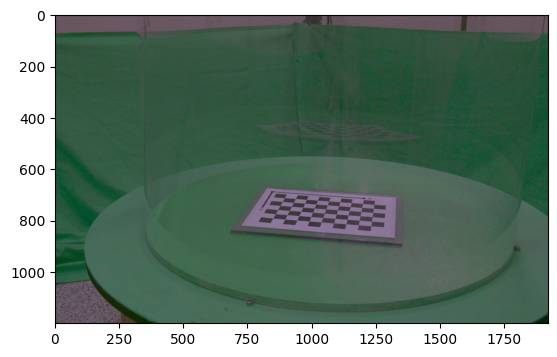

In [30]:
imshow(distorted_img)

In [31]:
undistorted_img = cv2.undistort(distorted_img, camera_matrix, dist)

In [35]:
objpoints = get_chessboard_coordinates(chessboard_rows=6, chessboard_cols=9, square_size_mm=23)

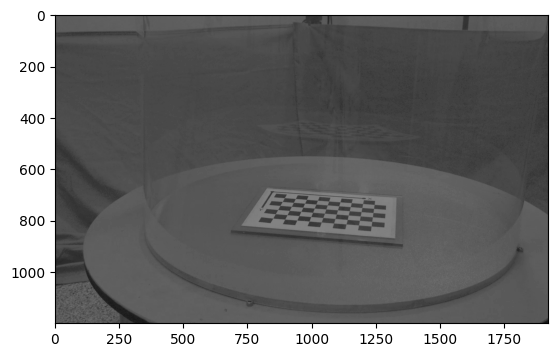

In [38]:
imshow(gray)

True


CORNER IMG
CORNER 2


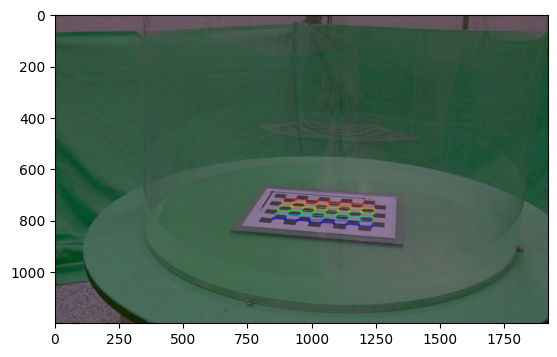

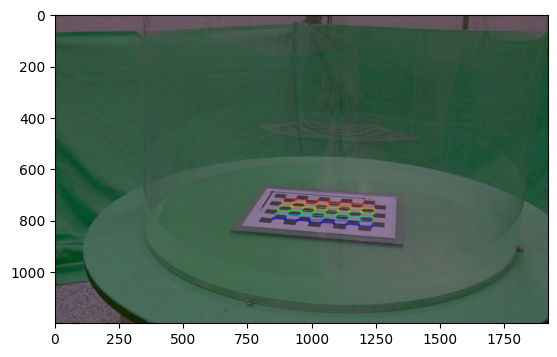

In [63]:
this_img = undistorted_img.copy()
gray = cv2.cvtColor(undistorted_img.copy(), cv2.COLOR_BGR2GRAY)

success, corner_coords = cv2.findChessboardCorners(gray, (9, 6), None)
print(success)

corner_img = this_img.copy()
cv2.drawChessboardCorners(corner_img, (9, 6), corner_coords, True)
print("CORNER IMG")
imshow(corner_img, 2)
err, mtx ,dist ,rvecs, tvecs = cv2.calibrateCamera(
    [objpoints], [corner_coords], (1920, 1200), None, None, flags=cv2.CALIB_FIX_K3
)
      

In [64]:
object_p
cv2.solvePnPRansac(
        objectPoints=object_points,
        imagePoints=corner_coords,
        cameraMatrix=intrinsics.camera_matrix,
        distCoeffs=dist_coeffs,
    )

NameError: name 'object_points' is not defined

In [93]:
camera_matrix

array([[2.32446619e+03, 0.00000000e+00, 9.69888498e+02],
       [0.00000000e+00, 2.32791287e+03, 5.95493637e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])